![](https://i.imgur.com/JsMvGnP.png)

# Projeto - Classificação

## 1. Considerações iniciais

Neste notebook iremos praticar a construção de um modelo de Machine Learning. Na atividade, iremos utilizar um algoritmo para realizar um processo de classificação. 

Como o foco da atividade será percorrer o fluxo do Aprendizado de Máquina por inteiro (ou o máximo dele), evitaremos, propositalmente, adentrar em algoritmos e explicações mais complexas.


### 1.1. O Problema de Negócio

A _churn rate_ (taxa de rotatividade ou cancelamento) é a porcentagem de assinantes que interrompem suas assinaturas de um serviço dentro de um determinado período de tempo. Para uma empresa expandir sua clientela, sua taxa de crescimento, medida pelo número de novos clientes, deve exceder sua taxa de cancelamento (_churn rate_).

Portanto, neste projeto, um banco deseja que você construa um modelo de Machine Learning que possa prever a probabilidade de seus clientes atuais fecharem suas contas em um futuro próximo e, portanto, calcular sua _churn rate_.

Esse é um problema de classificação no qual você classifica se um cliente irá sair (y=1) ou permanecer (y=0) com base diversos atributos.

### 1.2. Descrição do dados

Os dados necessários podem ser encontrados no [repositório da atividade](https://github.com/awarischool/br-classification-project). No arquivo *Churn_Modelling.csv* você encontrará:
- **RowNumber**: id do registro/linha.
- **CustomerId**: identificador único do cliente.
- **Surname**: sobrenome do cliente.
- **CreditScore**: pontuação de crédito do cliente.
- **Geography**: país de origem do cliente.
- **Gender**: sexo do cliente.
- **Age**: idade do cliente.
- **Tenure**: número de anos em que o cliente está com o banco.
- **Balance**: saldo bancário.
- **NumOfProducts**: número de produtos que o cliente utiliza.
- **HasCrCard**: indica se o cliente tem (1) ou não tem (0) cartão de crédito.
- **IsActiveMember**: indica se o cliente é (1) ou não é (0) ativo no banco.
- **EstimatedSalary**: salário estimado em dólares.
- **Exited**: indica se o cliente encerrou (1) a conta no banco ou se o cliente foi retido (0).


### 1.3 Métricas de Avaliação

Avalie seu modelo utilizando as métricas Acurácia e AUC (area under the ROC) estudadas nos módulos anteriores.

Trabalhe até conseguir uma acurácia acima e 85%.

## 2. Etapas do Projeto

Neste projeto você poderá seguir o fluxo que preferir, mas como sugestão pode seguir as seguintes etapas:
1. Análise exploratória 
2. Preparação e limpeza dos dados
3. Seleção de atributos
4. Construção do modelo
5. Avaliação do modelo
6. Otimização do modelo

Lembrando que esses passos, provavelmente, serão executados várias vezes até se obter um resultado satisfatório.

Sugestões de modelos:
* Logistic Regression Classification
* K-Nearest Neighbour (KNN) Classification
* Support Vector Machine (SVM) Classification
* Naive Bayes Classification
* Decision Tree Classification
* Random Forest Classification

Em caso de dúvidas, não esqueça de conversar com seu mentor.

## 3. Desenvolvimento do Projeto
*Adicione células você precisar para cada etapa*

In [11]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Churn_Modelling.csv', sep=',')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 3.1 Análise exploratória

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<AxesSubplot:>

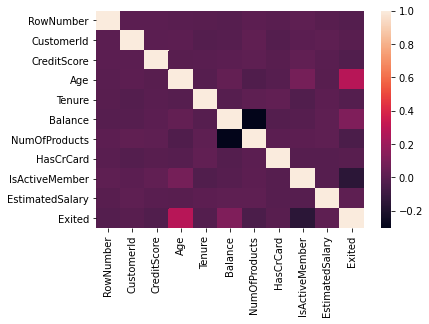

In [12]:
correlacao = df.corr()
sns.heatmap(data=correlacao)

### 3.2 Preparação e limpeza dos dados

In [13]:
# sem valores nulos, não precisa limpar os dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### 3.3 Seleção de atributos

In [14]:
X = df[['Age', 'Balance', 'EstimatedSalary', 'CreditScore']]
X

,Age,Balance,EstimatedSalary,CreditScore
0,42,0.00,101348.88,619
1,41,83807.86,112542.58,608
2,42,159660.80,113931.57,502
3,39,0.00,93826.63,699
4,43,125510.82,79084.10,850
...,...,...,...,...
9995,39,0.00,96270.64,771
9996,35,57369.61,101699.77,516
9997,36,0.00,42085.58,709
9998,42,75075.31,92888.52,772


In [15]:
y = df[['Exited']]
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [16]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.25)

### 3.4 Construção do modelo

In [18]:
from sklearn.dummy import DummyClassifier
dc = DummyClassifier(strategy='stratified')

In [19]:
dc.fit(X_treino, y_treino)

DummyClassifier(strategy='stratified')

In [20]:
result = dc.predict(X_teste)
result

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rfc = RandomForestClassifier()
rfc.fit (X_treino, y_treino)
result_rfc = rfc.predict(X_teste)
result_rfc

<ipython-input-22-e0f50c4a3f30>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit (X_treino, y_treino)


array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
from sklearn.svm import SVC

In [24]:
svc = SVC()
svc.fit(X_treino, y_treino)
result_svc = svc.predict(X_teste)
result_svc

C:\Users\Victoria\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### 3.5 Avaliação do modelo

In [25]:
dc.score(X_teste, y_teste)

0.6844

In [26]:
rfc.score(X_teste, y_teste)

0.8128

In [27]:
svc.score(X_teste, y_teste)

0.808

## 4. Conclusão
O fluxo de trabalho de Aprendizado de Máquina não termina após a avaliação de performance do modelo escolhido. Na verdade, esta seria somente a primeira iteração de um processo que pode ter dezenas de tentativas.

Encorajamos você a repetir novamente o processo descrito neste notebook. Contudo, explorando novas possibilidades para verificar a melhora/piora da performance do seu modelo. 

Você pode, por exemplo, remover variáveis/atributos menos importantes, normalizar variáveis importantes e escolher outros algoritmos de aprendizagem supervisionada. O Aprendizado de Máquina é uma área interessante justamente por causa disto. Você testa, você erra, você recomeça.